In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [618]:
class Map(object): 
    def __init__(self,size,learning_rate=0.1):
        self.size = size
        self.learning_rate = learning_rate
        self.neighborhood_radius = 0.01#(np.sqrt(1/2.0)*size)/4 #diagonal of the map
        #self.neurons = np.random.randn(size,size,2)
        self.neurons = np.random.uniform(0,1,(size,size,2))
        
    def find_bmu(self, input_node): #find best matching unit
        min_distance = np.inf
        bum_position = ()
        for row in xrange(self.size):
            for col in xrange(self.size):
                distance = Euclidean_distance(self.neurons[row,col], input_node)
                #print distance
                if distance < min_distance: 
                    min_distance = distance
                    bum_position =(row,col)
                    #print bum_index
        #print "min = ", min_distance
        return bum_position, min_distance
    
    
    def weight_update(self,input_node,bmu_position,new_radius, new_learning_rate): 
        for row in xrange(self.size):
            for col in xrange(self.size):
                current_position = (row,col)
                #print "DDDDDDD"
                #d = Euclidean_distance(bmu_position,np.array(current_position))
                d = Euclidean_distance(self.neurons[bmu_position], self.neurons[current_position])
                h = self.neighborhood_function(d, new_radius)
                delta_weight = input_node - self.neurons[current_position]
                new_weight = self.neurons[current_position] + new_learning_rate*h*delta_weight
                #if new_weight[0] <0:
                    #print "input node ", input_node
                    #print "h " ,h
                    #print "d ",d
                    #print "position ",self.neurons[current_position]
                    #print "bmu ", self.neurons[bmu_position]
                    #print "result ",self.neurons[current_position] + new_learning_rate*h*delta_weight
                    #print
                
                #print current_position
                #print self.neurons[current_position]
                #print "next"
                self.neurons[current_position] = new_weight
                #print "row {0}, col {1}, weight {2}".format(row,col,self.neurons[current_position]) 
    
    def learning_rate_update(self,turn,iteration):
        new_learning_rate = self.learning_rate * np.exp(-turn/float(iteration))
        return new_learning_rate
    
    def neighborhood_function(self, d, new_radius):
        h = np.exp(-np.square(float(d))/(2*np.square(new_radius)))
        #print h,d 
        return h
    
    def radius_update(self, turn, iteration):
        new_radius = self.neighborhood_radius * np.exp(-turn*np.log10(self.neighborhood_radius)/iteration)
        return new_radius
    
    def Kohonen_learning(self, training_set, iteration=1000):
        #print self.neurons
        training_set.plot(kind='scatter',x='x',y='y', c='yellow')
        t = self.neurons.copy()
        t.resize(self.size*self.size,2)
        plt.scatter(t[:,0],t[:,1])
        plt.show()
 
        train = np.array(training_set.iloc[:,:-1])
        
        for turn in xrange(iteration):
            for input_node in train: 
                bmu_position, d_bum = self.find_bmu(input_node)
                #print "D_bum ",d_bum
                winning_node = self.neurons[bmu_position]
                new_radius = self.radius_update(turn+1, iteration) # turn + 1 to avoid 0
                new_learning_rate = self.learning_rate_update(turn,iteration)
                self.weight_update(input_node,bmu_position,new_radius,new_learning_rate)
            #print "radius = {0}, learning_rate = {1}".format(new_radius, new_learning_rate)
            #print self.neurons
            #print "next"
            training_set.plot(kind='scatter',x='x',y='y', c='yellow', alpha=0.5)
            t = self.neurons.copy()
            t.resize(self.size*self.size,2)
            plt.scatter(t[:,0],t[:,1])
            plt.show()
            
        print "done"
        return self.neurons
        
        

In [619]:
def Euclidean_distance(pointA,pointB): #np array 
    #print pointA, pointB
    #print np.linalg.norm(pointA-pointB)
    #print "pointA {0}, pointB {1}, d = {2}".format(pointA, pointB,np.linalg.norm(pointA-pointB))
    return np.linalg.norm(pointA-pointB)

In [620]:
Euclidean_distance(np.array([-2,-1]), np.array([1,1]))

3.6055512754639891

Create dataframe

In [621]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [622]:
def z_score(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.mean())/new_df.x.std(ddof=0)
    new_df.y = (new_df.y - new_df.y.mean())/new_df.y.std(ddof=0)
    return new_df

In [623]:
def normalize(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.min())/(new_df.x.max() - new_df.x.min())
    new_df.y = (new_df.y - new_df.y.min())/(new_df.y.max() - new_df.y.min())
    return new_df

In [624]:
df = pd.read_csv('donneespb4.txt',sep=' ',header=None)
df.columns = ['x','y','Value']
df = str_to_float(df)
#df = z_score(df) 
df = normalize(df)
binary_code = [np.sign(x-.5) for x in df.Value] 
df['Class'] = binary_code 
df = df.drop('Value',1)
df.head()

,x,y,Class
0,0.745443,0.178058,1
1,0.038718,0.298100,-1
2,0.024899,0.335908,-1
3,0.040403,0.556396,-1
4,0.406911,0.876045,1


In [625]:
df.describe()

,x,y,Class
count,3000.000000,3000.000000,3000.000000
mean,0.383886,0.495651,-0.452000
std,0.339727,0.250649,0.892167
min,0.000000,0.000000,-1.000000
25%,0.053838,0.286890,-1.000000
50%,0.266477,0.490487,-1.000000
75%,0.708473,0.713925,1.000000
max,1.000000,1.000000,1.000000


In [626]:
.003 -.01

-0.007

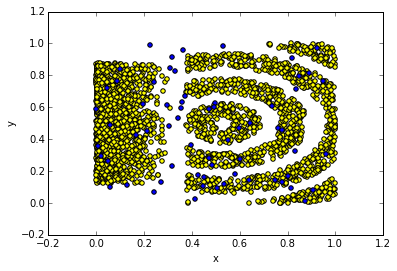

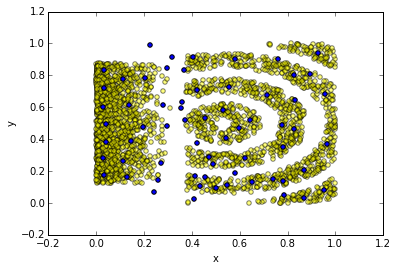

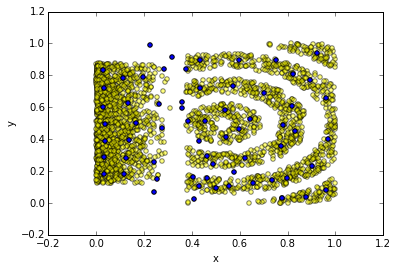

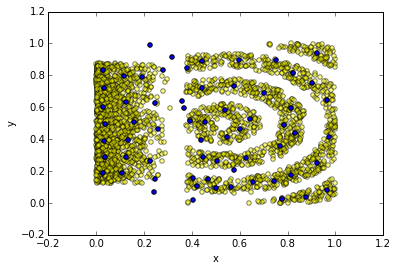

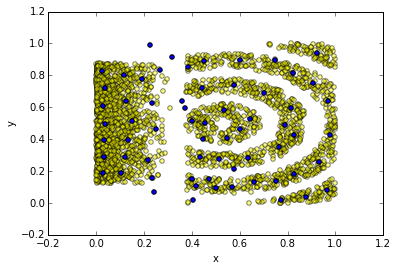

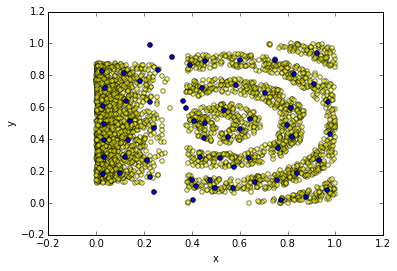

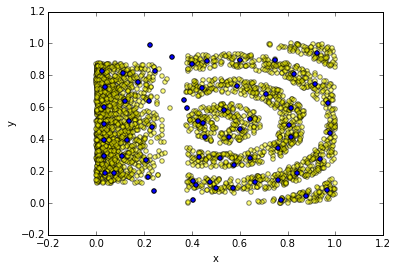

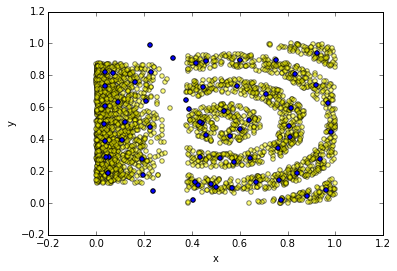

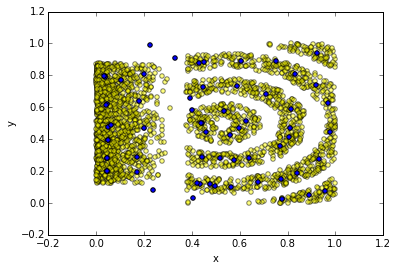

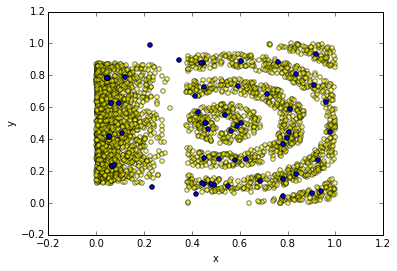

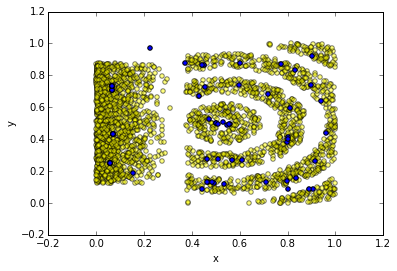

done


In [628]:
m = Map(size = 8, learning_rate = 0.04)
result = m.Kohonen_learning(training_set=df.iloc[:,], iteration=10)

In [544]:
t = result.copy()
t.resize(5*5,2)

In [47]:
t

array([[-0.44755792, -0.44755792],
       [ 0.5065228 ,  0.5065228 ],
       [ 0.92035142,  0.92035142],
       [ 0.98953955,  0.98953955],
       [ 0.99868822,  0.99868822],
       [-0.9144753 , -0.9144753 ],
       [-0.46531198, -0.46531198],
       [ 0.49371501,  0.49371501],
       [ 0.91863703,  0.91863703],
       [ 0.98953955,  0.98953955],
       [-0.98997927, -0.98997927],
       [-0.91933883, -0.91933883],
       [-0.47521096, -0.47521096],
       [ 0.49371501,  0.49371501],
       [ 0.92035142,  0.92035142],
       [-0.99891502, -0.99891502],
       [-0.99070918, -0.99070918],
       [-0.91933883, -0.91933883],
       [-0.46531198, -0.46531198],
       [ 0.5065228 ,  0.5065228 ],
       [-0.99987491, -0.99987491],
       [-0.99891502, -0.99891502],
       [-0.98997927, -0.98997927],
       [-0.9144753 , -0.9144753 ],
       [-0.44755792, -0.44755792]])

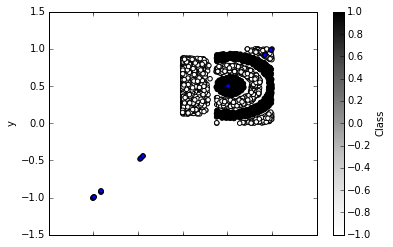

In [48]:
colormap = np.array(['b','b' ,'r'])
df.plot(kind='scatter',x='x',y='y', c='Class')
plt.scatter(t[:,0],t[:,1])
plt.show()